# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 8: Analiza danych przestrzennych z wykorzystaniem dedykowanych pakietów (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [46]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]
        
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # generate centers of clusters in broadened area
    centers = homogeneous_poisson_on_rectangle( parent_intensity, [x_lim[0] - 4 * cluster_sigma, x_lim[1] + 4 * cluster_sigma],
                                               [y_lim[0] - 4 * cluster_sigma, y_lim[1] + 4 * cluster_sigma] )
    
    # create empty dataframe to store points coords
    points = pd.DataFrame( columns= ["X", "Y"] )

    # draw points for each cluster center from normal distribution
    for center in centers.itertuples():
        # draw number of points for cluster from Poisson distribution
        n_points = np.random.poisson(mean_cluster_size)

        # draw points coord from normal distribution
        x_points = np.random.normal( center.X, cluster_sigma, n_points )
        y_points = np.random.normal( center.Y, cluster_sigma, n_points )
        
        # append to result dataframe
        xy_df = pd.DataFrame( { "X" : x_points, "Y" : y_points } )
        points = pd.concat( [xy_df, points] )
    
    # narrow area to original size
    points = points[ (points["X"] >= x_lim[0]) & (points["X"] <= x_lim[1]) & (points["Y"] >= y_lim[0]) & (points["Y"] <= y_lim[1]) ]
    return points


def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    # liczba punktów intensywnosc-srednia oczekiwana wartosc w danym kwadraciku 
    # intensywnosc* Pole powierzchni - argument do funkcji z ktorej wyciagamy wartoscliczby puntkow  z rozkladu poissona 
    ich lokalizacja jest z rozkladu normalnego 
    Parameters
    
    im nisza intensywnosc funkcji intensywnosci 1-i/imax  (0,1) 
    R(x,y)=x
    ------- 
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """

    # calculate area to generate points on
    area = ( x_lim[1] - x_lim[0] ) * ( y_lim[1] - y_lim[0] )

    # draw number of points from Poisson distribution
    n_points = np.random.poisson( area * intensity, 1 )

    # draw points coordinates from uniform distribution
    x_points = np.random.uniform( x_lim[0], x_lim[1], n_points ) 
    y_points = np.random.uniform( y_lim[0], y_lim[1], n_points )

    # create dataframe out of coordinates
    points = pd.DataFrame( { "X" : x_points, "Y" : y_points } )

    return points

### Wczytanie danych

Załączone do notatnika pliki zawierają dane niezbędne do wykonania zadań oraz dane wykorzystywane w zawartych w notatniku automatycznych testach. W celu wczytania danych do notatnika umieść pliki w tym samym folderze, w którym znajduje się notatnik.

In [2]:
# Wczytanie danych
data = gpd.read_file("data.zip", encoding="utf-8")
test_data_1 = gpd.read_file("test_data_1.zip", encoding="utf-8")
test_data_2 = gpd.read_file("test_data_2.zip", encoding="utf-8")
test_points = gpd.read_file("test_points.zip", encoding="utf-8")

### Zadanie 1: Przygotowanie danych (7 pkt)

#### a) Przygotowanie danych wejściowych

Wykorzystując dane zawarte w zmiennej `data` przygotuj następujące tablice:

1) Tablica `powiaty` zawierająca następujące kolumny:
    - "Nazwa" - nazwy powiatów
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica `wojewodztwa` zawierająca następujące kolumny:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
3) Tablica `kraj` zawierająca następujące kolumny:
    - "Nazwa" - nazwa kraju
    - "geometry" - geometria obiektu


Wyświetl przygotowane tablice.

Uwagi do wykonania zadania:
 - Podczas konstrukcji tablic zawierających geometrie województw i kraju wykorzystaj funkcję `geopandas.GeoDataFrame.dissolve()`.

In [8]:
# Powiaty
# YOUR CODE HERE
powiaty = data[['pow','geometry']]
powiaty.columns = ['Nazwa', 'geometry']

In [3]:
data.head()

,pow,woj,geometry
0,ropczycko-sędziszowski,podkarpackie,"POLYGON ((692305.365 260282.248, 692313.646 26..."
1,łosicki,mazowieckie,"POLYGON ((753920.175 497017.076, 753918.822 49..."
2,piaseczyński,mazowieckie,"POLYGON ((644442.384 473992.041, 644345.678 47..."
3,radomski,mazowieckie,"POLYGON ((638056.482 404421.246, 638059.412 40..."
4,sierpecki,mazowieckie,"POLYGON ((534236.749 555932.727, 534235.027 55..."


In [9]:
# Komórka testowa
assert type(powiaty) == gpd.geodataframe.GeoDataFrame
assert powiaty.shape == (380, 2)
assert list(powiaty.columns) == ['Nazwa', 'geometry']

In [24]:
# Województwa
# YOUR CODE HERE
wojewodztwa = data.dissolve('woj',sum)

In [25]:
wojewodztwa.head()
wojewodztwa.reset_index(inplace=True)

In [26]:
wojewodztwa = wojewodztwa[['woj','geometry']]
wojewodztwa.columns = ['Nazwa','geometry']

In [27]:
# Komórka testowa
assert type(wojewodztwa) == gpd.geodataframe.GeoDataFrame
assert wojewodztwa.shape == (16, 2)
assert list(wojewodztwa.columns) == ['Nazwa', 'geometry']

In [29]:
# Kraj
# YOUR CODE HERE
kraj = data.dissolve(aggfunc=sum)

In [32]:
kraj['Nazwa'] = 'Polska'
kraj = kraj[['Nazwa','geometry']]

In [33]:
# Komórka testowa
assert type(kraj) == gpd.geodataframe.GeoDataFrame
assert kraj.shape == (1, 2)
assert list(kraj.columns) == ['Nazwa', 'geometry']

#### b) Wizualizacja danych wejściowych

Zwizualizuj dane wejściowe na pojedynczym wykresie tak by poszczególnej jednostki administracyjne nie posiadały wypełnienia, a ich granice były oznaczone coraz grubszymi i ciemniejszymi liniami wraz ze wzrostem ważności jednostek. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError(

### Zadanie 2: Adaptacja funkcji generującej proces punktowy w obrębie prostokąta (10 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `adapted_thomas_on_polygon()`, która będzie wykorzystywała funkcję `thomas_on_rectangle()` przygotową w ramach pierwszego zestawu zadań oraz możliwości pakietu geopandas do generowania procesu Thomasa w obrębie dowolnego poligonu.

Uwagi do wykonania zadania:
- Podczas wykonania zadania wykorzystaj następujące funkcje i własności: `geopandas.GeoSeries.bounds`, `geopandas.GeoSeries.from_xy()`, `geopandas.GeoSeries.set_crs()` i `geopandas.GeoSeries.within()`.

In [168]:
def adapted_thomas_on_polygon(parent_intensity, mean_cluster_size, cluster_sigma, polygon):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.
    
    Returns
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    # YOUR CODE HERE
    values = polygon.bounds
    print(values)
    df = thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma,[values['minx'][0],values['maxx'][0]], [values['miny'][0], values['maxy'][0]])
    our_crs = polygon.crs 
    points = gpd.GeoDataFrame(gpd.GeoSeries.from_xy(df['X'], df['Y'], crs=our_crs))
    points.columns = ['geometry']
    print(polygon['geometry'][0])
    mask = points.within(polygon['geometry'][0]).tolist()
    points = points[mask]
    print(points)
   
    return points
                                                                                 

In [169]:
# Komórka testowa
test_points_1 = adapted_thomas_on_polygon(7*10**(-10), 25, 7*10**3, test_data_1)
assert type(test_points_1) == gpd.GeoDataFrame
assert list(test_points_1.columns) == ["geometry"]
assert np.all(test_points_1.within(test_data_1["geometry"][0]))

            minx           miny          maxx           maxy
0  505961.508535  146221.787483  675319.14817  295275.976934
POLYGON ((568911.2885463749 294804.26911552716, 568909.0811732319 294812.7273553787, 568867.5277842501 294976.86339975055, 568867.033658288 294979.6193502294, 568827.4789675314 295189.0370918019, 568819.1898028285 295219.50547936466, 568817.1377169153 295225.5385676073, 568804.1460025648 295273.95538498554, 568817.9995470893 295274.42867300846, 568822.492658427 295274.6397703774, 568856.527481677 295275.9769344153, 568895.5133843352 295266.8403404588, 568941.5436173817 295268.2307824679, 568981.4607038974 295269.4264996201, 568988.6379013187 295269.09014714137, 569037.7190189045 295268.93327777367, 569052.8863377098 295268.88210438006, 569064.1443195395 295268.84568448644, 569067.1937290962 295268.8378055198, 569075.4519830764 295268.8205029322, 569092.2485009813 295268.7832774287, 569095.5323248713 295269.3516130168, 569115.6740625174 295270.9442382958, 569154.1818

                         geometry
0   POINT (634921.406 192016.101)
1   POINT (632197.982 192099.480)
2   POINT (634271.700 203898.111)
3   POINT (636258.621 198945.237)
4   POINT (627716.536 182542.698)
..                            ...
31  POINT (661912.073 190902.842)
32  POINT (627958.806 174314.735)
33  POINT (648683.204 178790.622)
6   POINT (559625.823 153872.003)
20  POINT (558803.190 152932.542)

[311 rows x 1 columns]


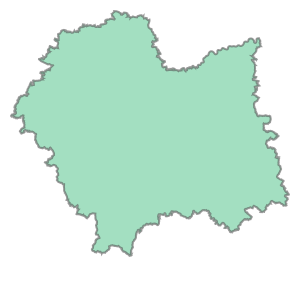

In [174]:
test_data_1['geometry'][0]


#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowaną funkcję do wygenerowania rozkładu punktów o intensywności procesu macierzystego $5 \cdot 10^{-10} pkt/m^2$, oczekiwanej liczebności klastrów 50 i odchyleniu standardowym klastrów $7.5 \cdot 10^3$ na obszarze województwa mazowieckiego.

Zwizualizuj wyniki w postaci wykresu punktowego nałożonego na kontury granic województw. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Zadanie 3: Generowanie procesów punktowych z wykorzystaniem dedykowanych funkcji (10 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcje `homogeneous_poisson_on_polygon()` oraz `clustered_poisson_on_polygon()`, które będzą generować odpowiednio jednorodny proces Poissona oraz sklasteryzowany proces punktowy Poissona (proces Neymana-Scotta) w obrębie dowolnego poligonu.

Uwagi do wykonania zadania:
 - Projektując funkcje skorzystaj z funkcji `geopandas.GeoSeries.sample_points()` oraz `geopandas.GeoSeries.explode()`.

In [ ]:
def homogeneous_poisson_on_polygon(intensity, polygon):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.

    Returns
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
def clustered_poisson_on_polygon(parent_intensity, daughter_intensity, cluster_radius, polygon):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: int
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.
  
    Returns
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Komórka testowa
test_points_2 = homogeneous_poisson_on_polygon(7*10**(-9), test_data_1)
assert type(test_points_2) == gpd.GeoDataFrame
assert list(test_points_2.columns) == ["geometry"]
assert np.all(test_points_2.within(test_data_1["geometry"][0]))

test_points_3 = clustered_poisson_on_polygon(6*10**(-10), 9*10**(-9), 20000, test_data_1)
assert type(test_points_3) == gpd.GeoDataFrame
assert list(test_points_3.columns) == ["geometry"]
assert np.all(test_points_3.within(test_data_1["geometry"][0]))

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do wygenerowania następujących rozkładów punkotwych:

Rozkład 1 - jednorodny proces Poissona:
 - intensywność procesu: $5 \cdot 10^{-9} pkt/m^2$ 
 - obszar: Polska
 
Rozkład 2 - sklasteryzowany proces Poissona:
 - intensywność procesu macierzystego: $0.75 \cdot 10^{-10} pkt/m^2$ 
 - intensywność procesu: $2.5 \cdot 10^{-9} pkt/m^2$ 
 - promień klastra: $50 km$
 - obszar: Polska 
 
Rozkład 3 - jednorodny proces Poissona:
 - intensywność procesu: $6 \cdot 10^{-9} pkt/m^2$ 
 - obszar: Wielkopolska

Przedstaw wygenerowane rozkłady w postaci wykresów punktowego nałożonych na kontury granic kraju (rozkłady 1, 2) lub na kontury granic województw (rozkład 3). Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x3). Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Zadanie 4: Badanie intensywności procesów punktowych metodą szacowania lokalnego  (8 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie podobszarów.

Uwagi do wykonania zadania:
- Projektując funkcje skorzystaj z funkcji `geopandas.GeoSeries.within()` oraz własności `geopandas.GeoSeries.area`.
- W części zadania dotyczącej funkcji obliczającej intensywność procesu nie należy dublować kodu napisanego w funkcji zliczającej punkty w obrębie podobszarów, a jedynie wywołać przygotowaną wcześniej funkcję `point_count_on_subregions()`.

In [ ]:
def point_count_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej subregions.
    subregions: GeoDataFrame
        Tablica GeoPandas, zawierająca w kolumnie "geometry" poligony w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej points,
        na których mają zostać zliczone punkty.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca liczbą punktów przypisanych do każdego z podobszarów.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej subregions.
    subregions: GeoDataFrame
        Tablica GeoPandas, zawierająca w kolumnie "geometry" poligony w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej points,
        na których mają zostać wyliczone wartości intensywności procesu.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Komórka testowa
test_intensity = intensity_on_subregions(test_points, test_data_2)
assert type(test_intensity) == pd.Series
assert np.isclose(test_intensity.min(), 0.0)
assert np.isclose(test_intensity.max(), 9.190361956135075e-09)
assert np.isclose(test_intensity.mean(), 2.495976569712346e-09)

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do zbadania intensywności rozkładów punktów wygenerowanych w poprzednim zadaniu w obrębie całego kraju na obszarze poszczegolnych powiatów.

Przedstaw wyniki analizy graficznie w postaci kartogramów z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2). Dla wszystkich histogramów ustaw tę samą skalę kolorów z identycznym zakresem wartości ustalonym na podstawie minimalnej i maksymalnej wartości intensywności wyznaczonej dla kompletu analizowanych rozkładów. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()